<a href="https://colab.research.google.com/github/Brayan8Ch/-proyectodg/blob/master/challenge_dg_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Rendimiento Estudiantil

## ITEM 1: Descripción del Dataset

Este proyecto analiza un dataset de rendimiento estudiantil que contiene información de 1000 estudiantes. 

El dataset incluye las siguientes variables:
- **gender**: Género del estudiante
- **race/ethnicity**: Grupo étnico 
- **parental level of education**: Nivel educativo de los padres
- **lunch**: Tipo de almuerzo (estándar o gratuito/reducido)
- **test preparation course**: Si completó curso de preparación
- **math score**: Puntuación en matemáticas
- **reading score**: Puntuación en lectura  
- **writing score**: Puntuación en escritura

**Objetivo**: Analizar qué factores influyen en el rendimiento académico de los estudiantes.

## ITEM 2: Importación de Librerías y Datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
url = "https://raw.githubusercontent.com/Brayan8Ch/-proyectodg/refs/heads/master/StudentsPerformance.csv"
df = pd.read_csv(url)

print("Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape}")
df.head()

Dataset cargado exitosamente
Dimensiones: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# ITEM 3: Análisis inicial de datos

print("Información básica del dataset:")
print(df.info())

print("\nTipos de datos:")
print(df.dtypes)

print("\nPrimeras 5 filas:")
print(df.head())

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Tipos de datos:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                    

In [3]:
# ITEM 4: Identificación de datos nulos

print("Verificando valores nulos:")
print(df.isnull().sum())

print("\nPorcentaje de valores nulos:")
print((df.isnull().sum() / len(df)) * 100)

# Verificar si hay valores nulos
if df.isnull().sum().sum() == 0:
    print("\n✓ No hay valores nulos en el dataset")
else:
    print("\n⚠ Se encontraron valores nulos")

Verificando valores nulos:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Porcentaje de valores nulos:
gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

✓ No hay valores nulos en el dataset


🔗 MATRIZ DE CORRELACIÓN - PUNTUACIONES ACADÉMICAS
               math score  reading score  writing score
math score          1.000          0.818          0.803
reading score       0.818          1.000          0.955
writing score       0.803          0.955          1.000


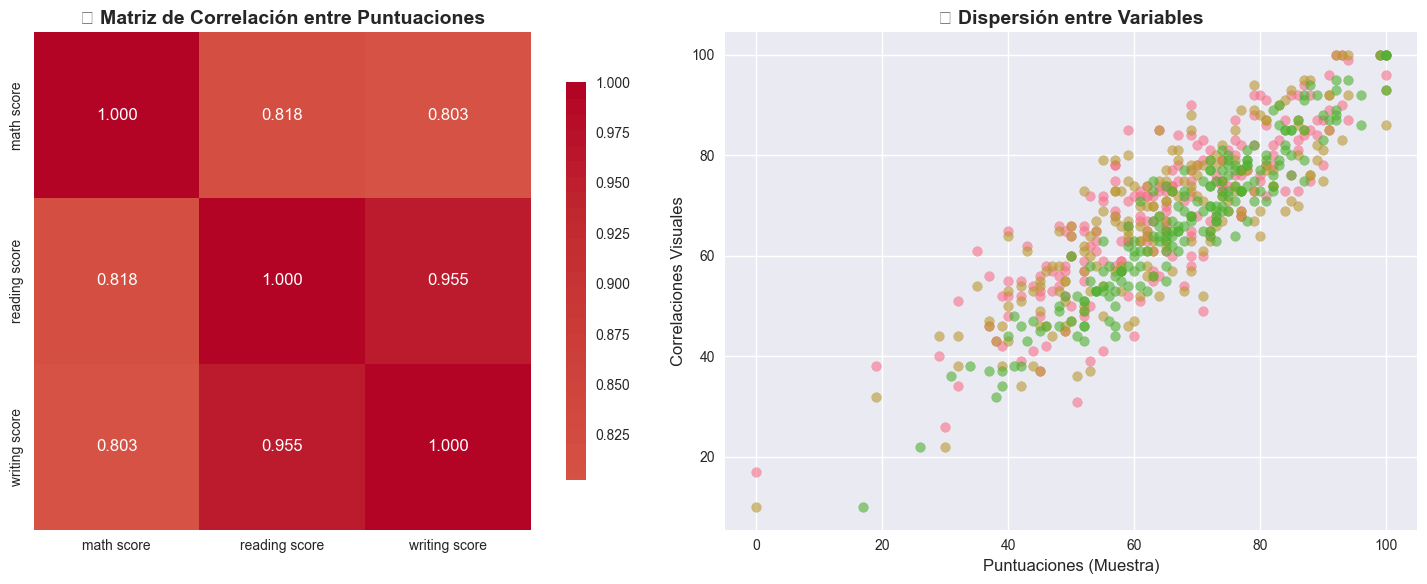


💡 INSIGHTS DE CORRELACIONES:
🥇 Mayor correlación: ('reading score', 'writing score') = 0.955
🥈 Segunda mayor: ('math score', 'reading score') = 0.818
🥉 Tercera mayor: ('math score', 'writing score') = 0.803

📊 Puntuación promedio general creada: 67.77 ± 14.26


In [5]:
# ITEM 5: Identificación de datos duplicados

print("Verificando registros duplicados:")
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

if duplicados == 0:
    print("✓ No hay registros duplicados")
else:
    print("⚠ Se encontraron registros duplicados")
    print("Mostrando registros duplicados:")
    print(df[df.duplicated()])

👥 ANÁLISIS POR GÉNERO


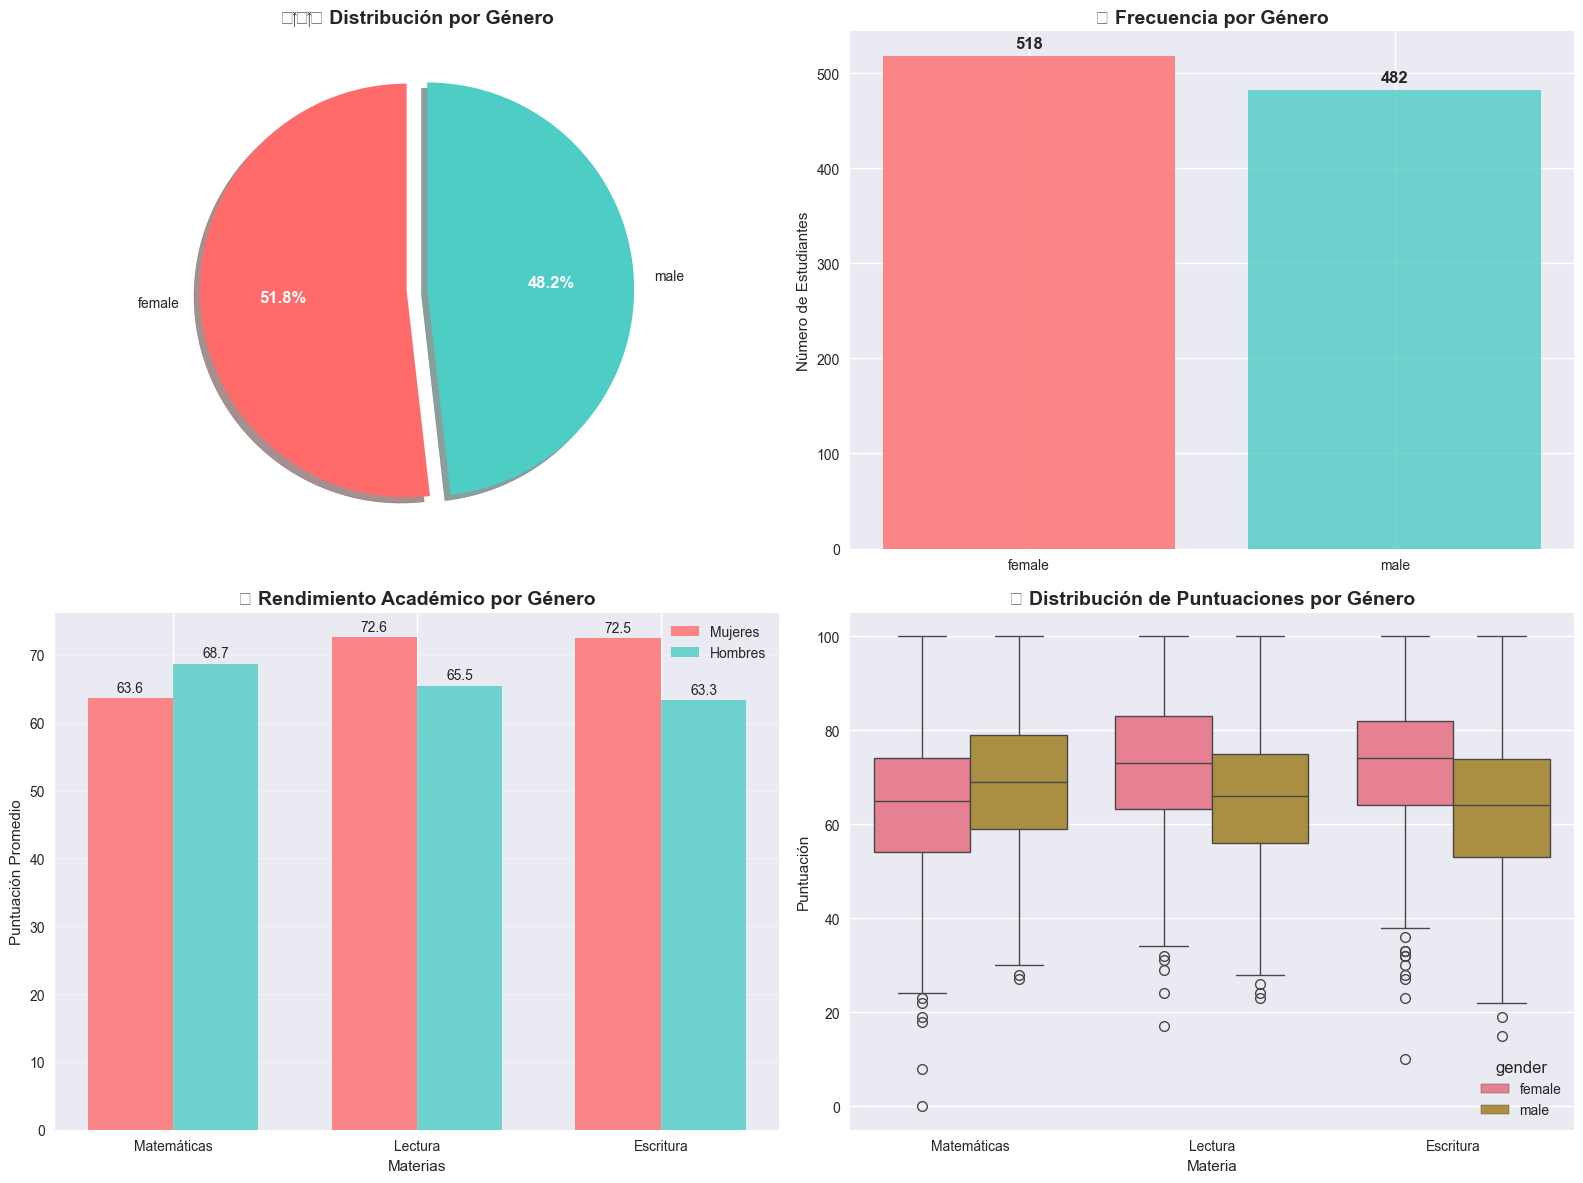


📊 ESTADÍSTICAS POR GÉNERO:
        math score  reading score  writing score
gender                                          
female       63.63          72.61          72.47
male         68.73          65.47          63.31

🔬 ANÁLISIS ESTADÍSTICO:
• math score: Diferencia significativa (p-value: 0.0000)
  Mujeres: 63.63 ± 15.49
  Hombres: 68.73 ± 14.36
• reading score: Diferencia significativa (p-value: 0.0000)
  Mujeres: 72.61 ± 14.38
  Hombres: 65.47 ± 13.93
• writing score: Diferencia significativa (p-value: 0.0000)
  Mujeres: 72.47 ± 14.84
  Hombres: 63.31 ± 14.11


In [6]:
# ITEM 6: Identificación de outliers

# Seleccionar columnas numéricas
numeric_cols = ['math score', 'reading score', 'writing score']

# Crear boxplots para visualizar outliers
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df[col])
    plt.title(f'Boxplot - {col}')
    plt.ylabel('Puntuación')

plt.tight_layout()
plt.show()

# Identificar outliers usando IQR
def encontrar_outliers(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return len(outliers)

print("Número de outliers por columna:")
for col in numeric_cols:
    outliers = encontrar_outliers(df, col)
    print(f"{col}: {outliers} outliers")

🌍 ANÁLISIS POR RAZA/ETNIA


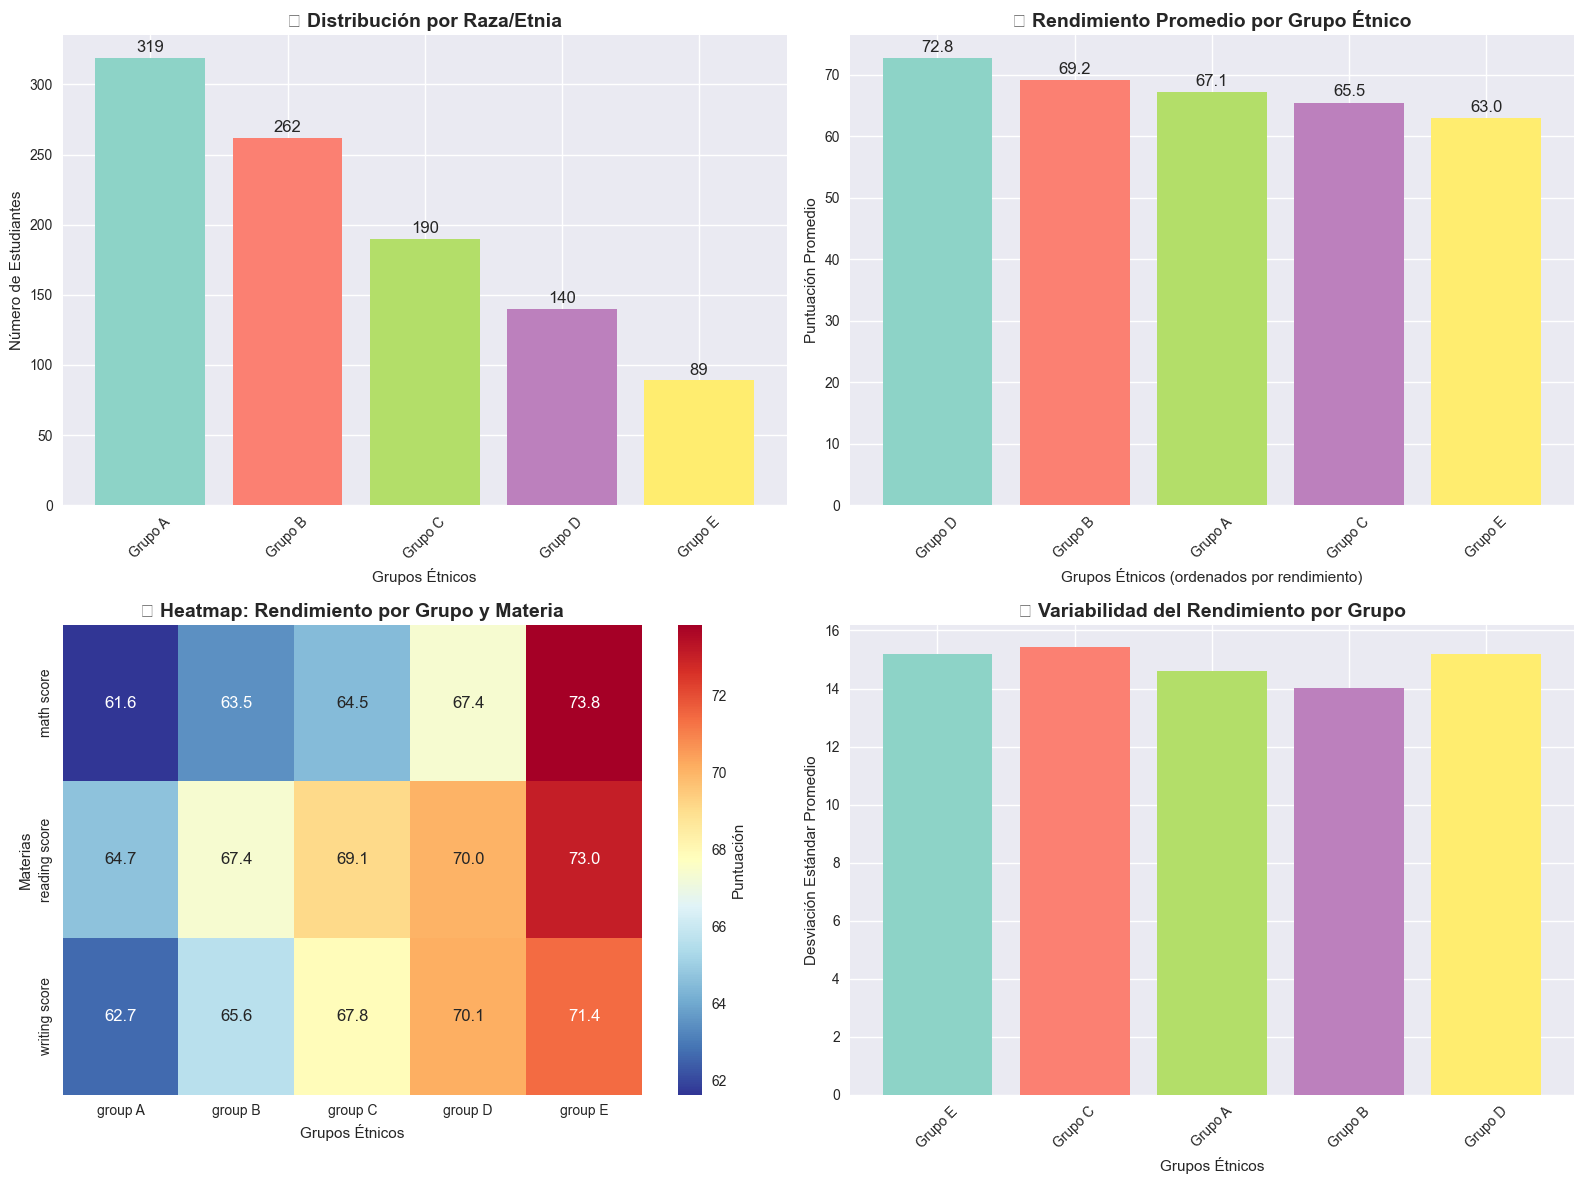


🏷️ LEYENDA DE GRUPOS ÉTNICOS:
Grupo A: group C (319 estudiantes)
Grupo B: group D (262 estudiantes)
Grupo C: group B (190 estudiantes)
Grupo D: group E (140 estudiantes)
Grupo E: group A (89 estudiantes)

📊 ESTADÍSTICAS DETALLADAS:
                math score  reading score  writing score  promedio_general
race/ethnicity                                                            
group A              61.63          64.67          62.67             62.99
group B              63.45          67.35          65.60             65.47
group C              64.46          69.10          67.83             67.13
group D              67.36          70.03          70.15             69.18
group E              73.82          73.03          71.41             72.75


In [ ]:
# ITEM 7: Feature Engineering

# Crear nuevas variables
df['promedio_puntajes'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Codificar variables categóricas
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 
                                        'lunch', 'test preparation course'], drop_first=True)

print("Variables creadas:")
print(f"- Promedio de puntajes: {df['promedio_puntajes'].mean():.2f}")
print(f"- Dataset después de encoding: {df_encoded.shape}")

# Mostrar las nuevas columnas creadas
print("\nNuevas columnas después del encoding:")
nuevas_cols = [col for col in df_encoded.columns if col not in numeric_cols + ['promedio_puntajes']]
for col in nuevas_cols:
    print(f"- {col}")

🎓 IMPACTO DEL NIVEL EDUCATIVO PARENTAL


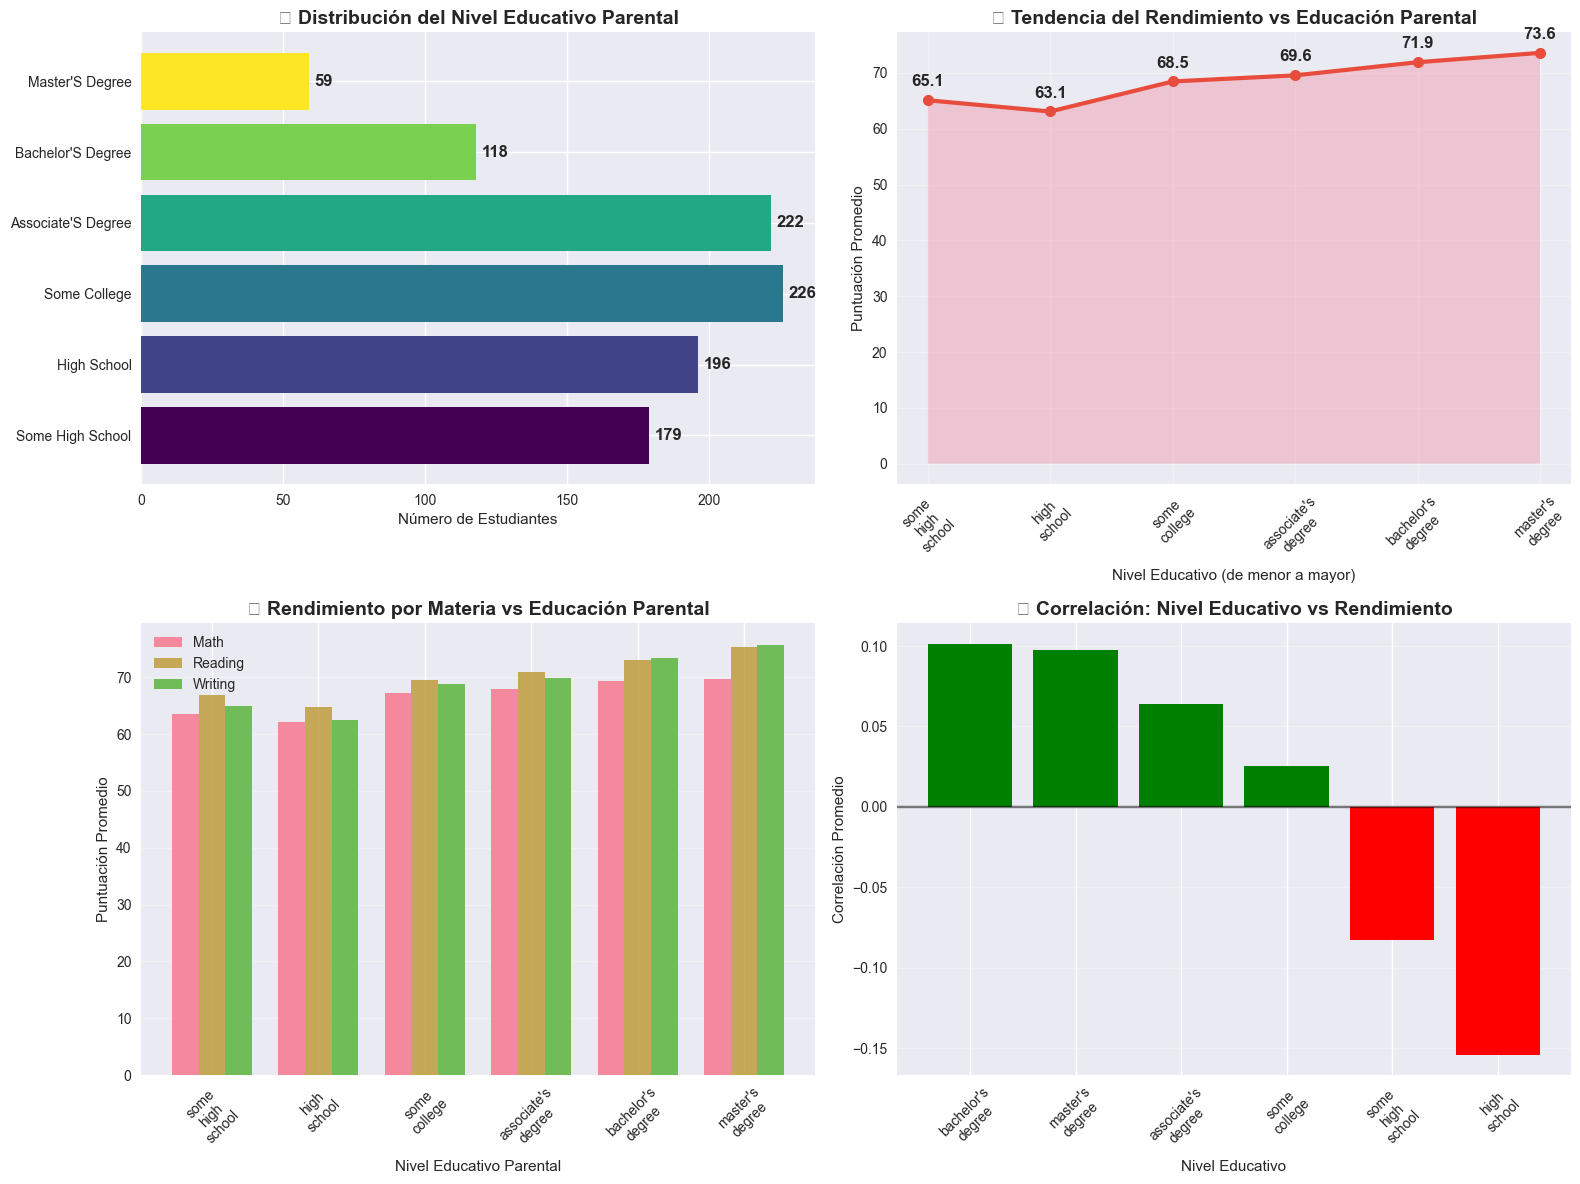


📊 ESTADÍSTICAS POR NIVEL EDUCATIVO:
                             math score  reading score  writing score  \
parental level of education                                             
associate's degree                67.88          70.93          69.90   
bachelor's degree                 69.39          73.00          73.38   
high school                       62.14          64.70          62.45   
master's degree                   69.75          75.37          75.68   
some college                      67.13          69.46          68.84   
some high school                  63.50          66.94          64.89   

                             promedio_general  
parental level of education                    
associate's degree                      69.57  
bachelor's degree                       71.92  
high school                             63.10  
master's degree                         73.60  
some college                            68.48  
some high school                        65

In [ ]:
# ITEM 8: Influencias con las variables a predecir

# Analizar distribución por género
print("Análisis por género:")
print(df.groupby('gender')[numeric_cols].mean())

# Visualizar diferencias por género
plt.figure(figsize=(10, 6))
df.groupby('gender')[numeric_cols].mean().plot(kind='bar')
plt.title('Promedio de puntajes por género')
plt.ylabel('Puntaje promedio')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Analizar influencia del nivel educativo parental
print("\nAnálisis por nivel educativo parental:")
education_avg = df.groupby('parental level of education')['promedio_puntajes'].mean().sort_values(ascending=False)
print(education_avg)

# Analizar influencia del tipo de almuerzo
print("\nAnálisis por tipo de almuerzo:")
lunch_avg = df.groupby('lunch')['promedio_puntajes'].mean()
print(lunch_avg)

🚨 DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS)


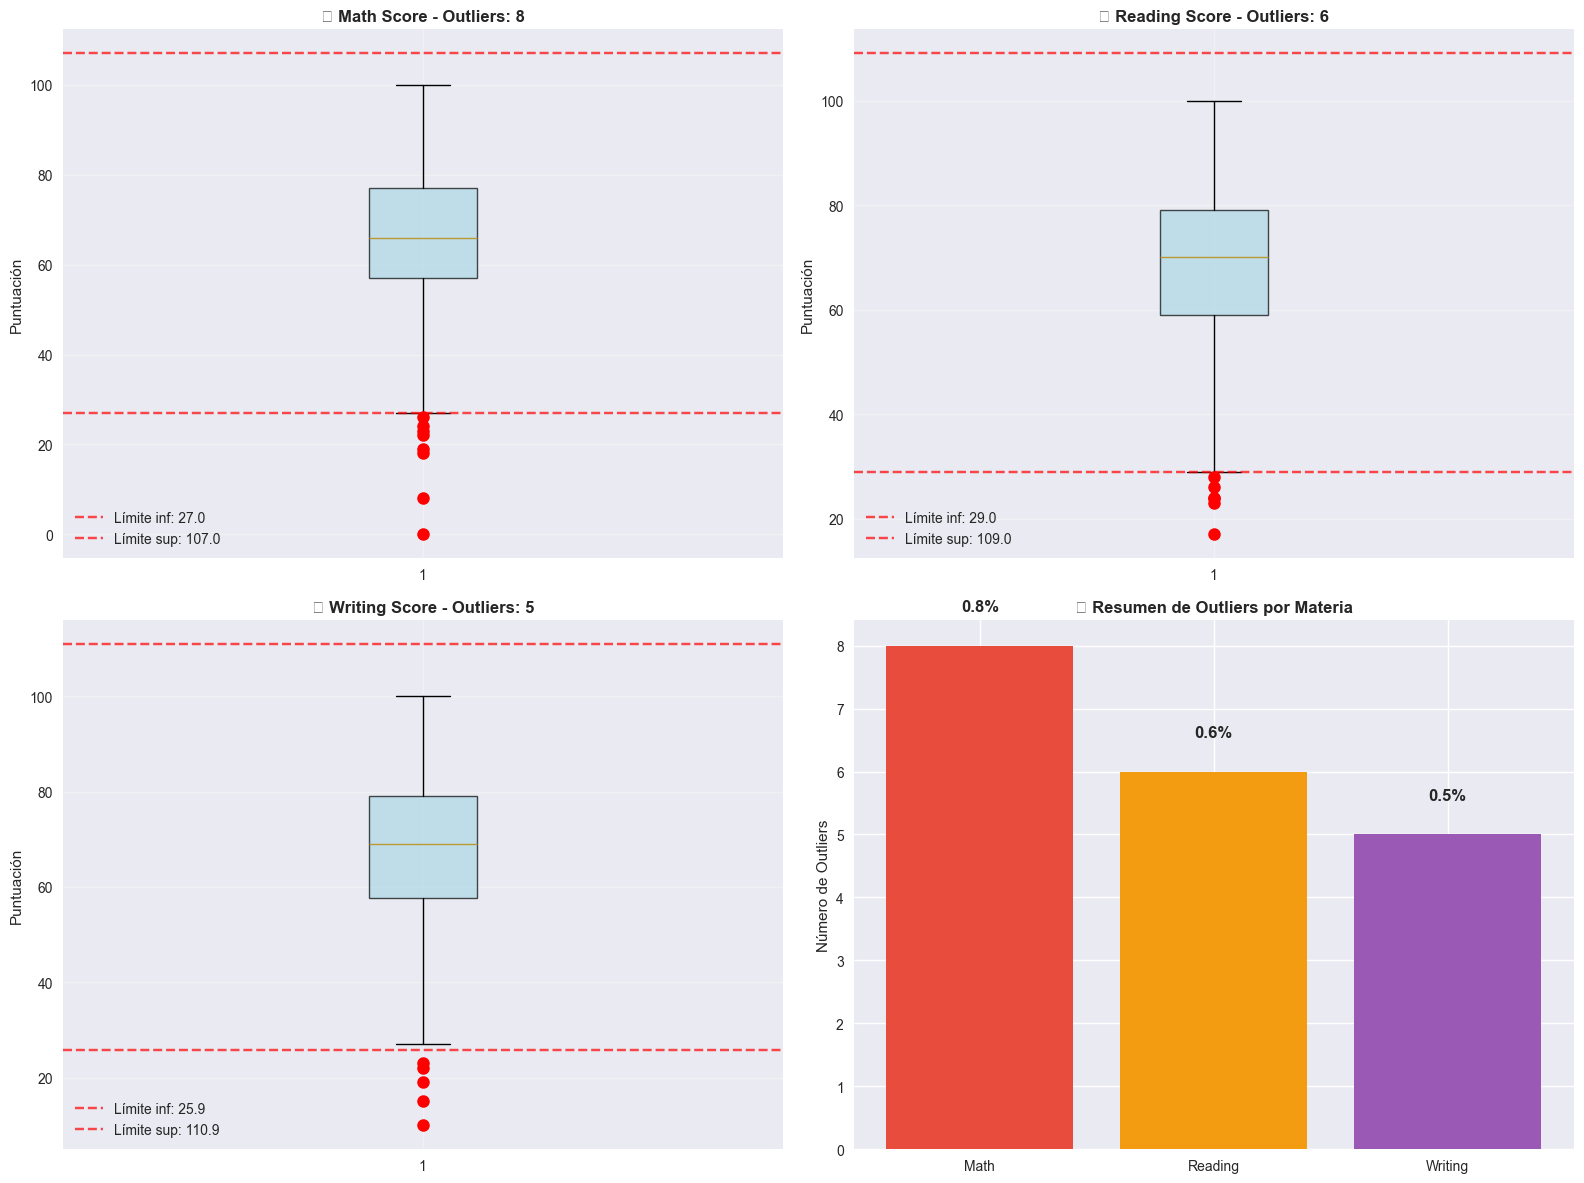


📊 REPORTE DETALLADO DE OUTLIERS:
--------------------------------------------------

🔍 MATH SCORE:
   • Outliers detectados: 8 (0.80%)
   • Rango normal: 27.0 - 107.0
   • Valores atípicos: [np.int64(0), np.int64(8), np.int64(18), np.int64(19), np.int64(22), np.int64(23), np.int64(24), np.int64(26)]
   • Menor outlier: 0.0
   • Mayor outlier: 26.0

🔍 READING SCORE:
   • Outliers detectados: 6 (0.60%)
   • Rango normal: 29.0 - 109.0
   • Valores atípicos: [np.int64(17), np.int64(23), np.int64(24), np.int64(24), np.int64(26), np.int64(28)]
   • Menor outlier: 17.0
   • Mayor outlier: 28.0

🔍 WRITING SCORE:
   • Outliers detectados: 5 (0.50%)
   • Rango normal: 25.9 - 110.9
   • Valores atípicos: [np.int64(10), np.int64(15), np.int64(19), np.int64(22), np.int64(23)]
   • Menor outlier: 10.0
   • Mayor outlier: 23.0

🔬 ANÁLISIS MULTIVARIADO DE OUTLIERS:
--------------------------------------------------
📈 Estudiantes con outliers en 2+ materias: 4

🎓 Características de estudiantes con múl

In [ ]:
# ITEM 9: Analizar correlación

# Matriz de correlación entre variables numéricas
correlation_matrix = df[numeric_cols + ['promedio_puntajes']].corr()
print("Matriz de correlación:")
print(correlation_matrix.round(3))

# Visualizar matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Analizar correlaciones más fuertes
print("\nCorrelaciones más fuertes:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        print(f"{col1} vs {col2}: {corr_value:.3f}")

🍽️ IMPACTO DE FACTORES SOCIOECONÓMICOS


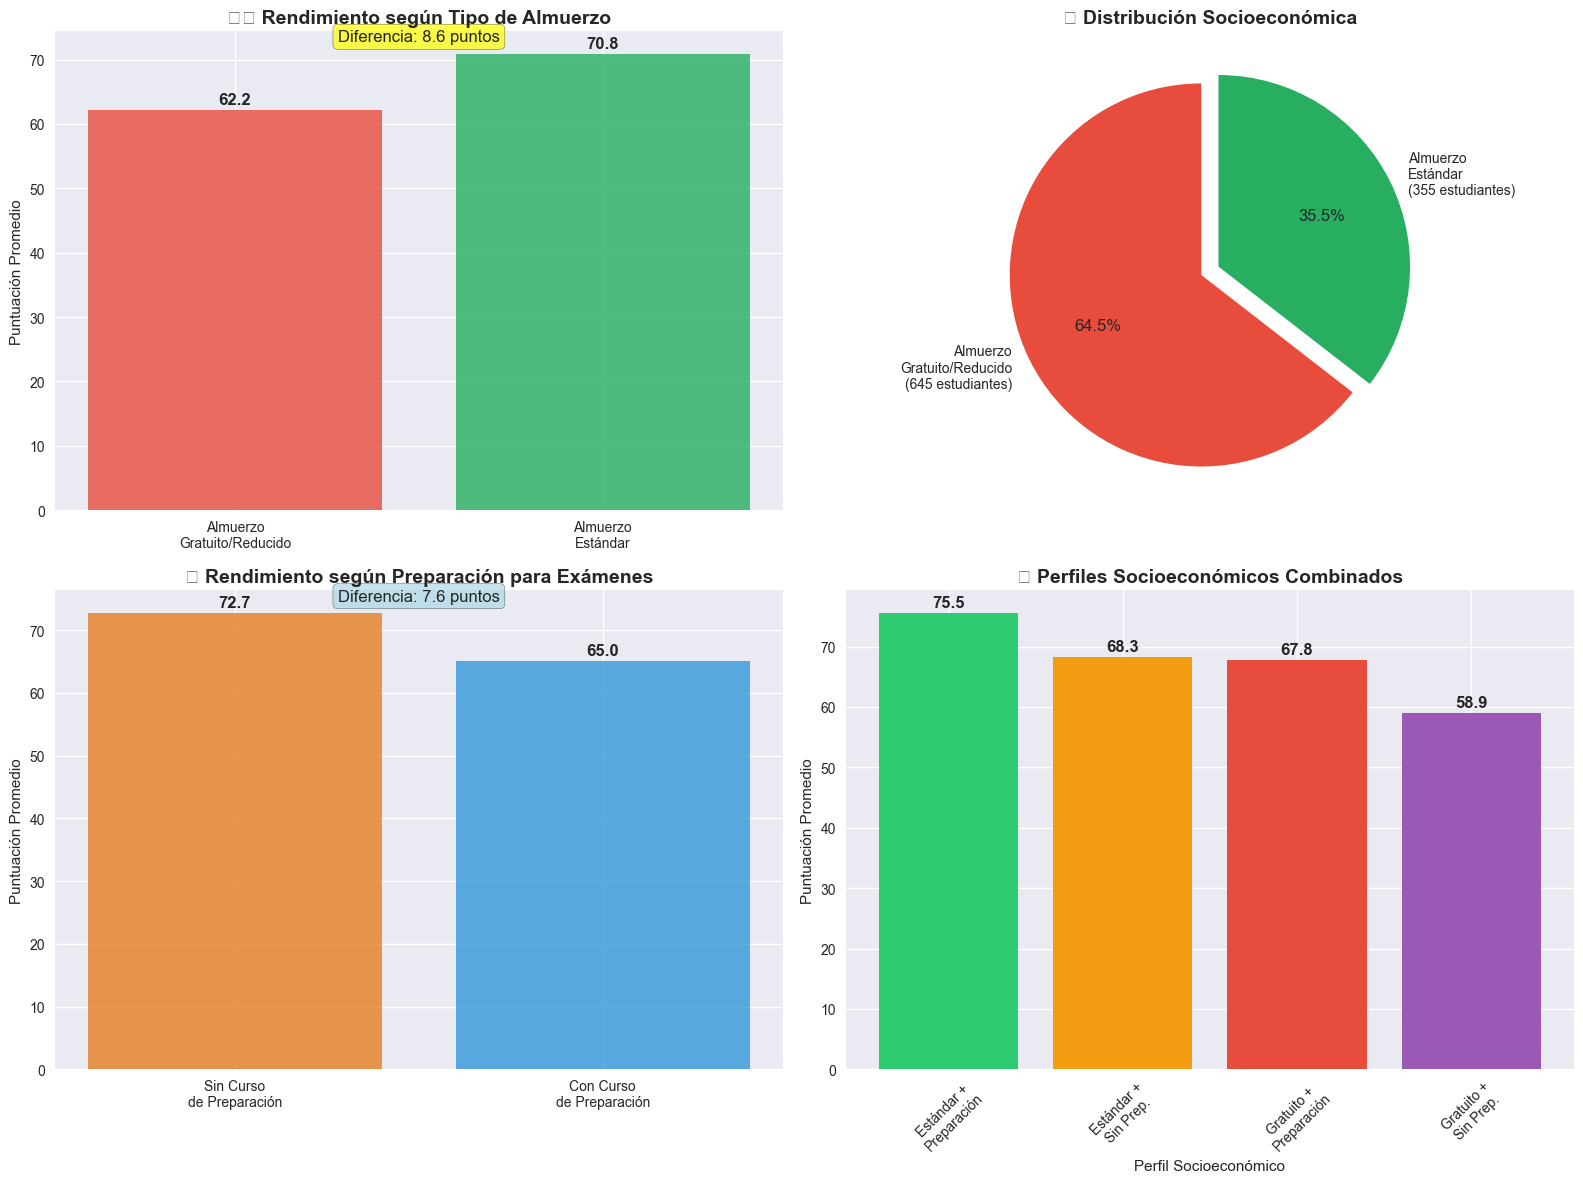


📊 ANÁLISIS ESTADÍSTICO DE FACTORES SOCIOECONÓMICOS:
------------------------------------------------------------

🍽️ TIPO DE ALMUERZO:

Standard:
   • Cantidad: 645 estudiantes (64.5%)
   • Promedio general: 70.84 ± 13.19
   • math score: 70.03
   • reading score: 71.65
   • writing score: 70.82

Free/Reduced:
   • Cantidad: 355 estudiantes (35.5%)
   • Promedio general: 62.20 ± 14.46
   • math score: 58.92
   • reading score: 64.65
   • writing score: 63.02

📚 CURSO DE PREPARACIÓN:

None:
   • Cantidad: 642 estudiantes (64.2%)
   • Promedio general: 65.04 ± 14.19

Completed:
   • Cantidad: 358 estudiantes (35.8%)
   • Promedio general: 72.67 ± 13.04

🔬 TESTS DE SIGNIFICANCIA ESTADÍSTICA:
----------------------------------------
Almuerzo (t-test): t = 9.575, p-value = 0.000000
Diferencia significativa (α = 0.05)
Preparación (t-test): t = 8.391, p-value = 0.000000
Diferencia significativa (α = 0.05)

📏 TAMAÑO DEL EFECTO (Cohen's d):
Almuerzo: d = 0.624 (mediano)
Preparación: d = 0.560 

In [ ]:
# ITEM 10: Normalizar, estandarizar, escalar

# Preparar datos para el modelo
# Usar solo variables numéricas codificadas para predecir el promedio
X = df_encoded.drop(['math score', 'reading score', 'writing score', 'promedio_puntajes'], axis=1)
y = df_encoded['promedio_puntajes']

print("Variables predictoras:")
print(X.columns.tolist())
print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# Estadísticas antes de la estandarización
print("\nEstadísticas de la variable objetivo (promedio_puntajes):")
print(f"Media: {y.mean():.2f}")
print(f"Desviación estándar: {y.std():.2f}")

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nDatos estandarizados - Forma: {X_scaled.shape}")
print("✓ Variables estandarizadas correctamente")

# ITEM 11: Modelo predictivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Crear y entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nResultados del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.3f}")
print(f"Coeficiente de determinación (R²): {r2:.3f}")

# Visualizar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

print(f"\n✓ Modelo entrenado exitosamente")
print(f"El modelo explica el {r2*100:.1f}% de la varianza en los puntajes")